In [1]:
%load_ext autoreload
%autoreload 2
    
from manager import * 
import rosnode
import time
from env_utils.algo_constants import *


In [2]:
if '/manager' in rosnode.get_node_names():
    # print("Manager is running")
    rosnode.kill_nodes(['manager'])
    time.sleep(1)

m = Manager(skip_checks=False, 
            debug_flag=True, 
           )
            # fake_hardware_flags=[FAKE_ARM, FAKE_PXRF])
# m.fake_pxrf_values = [0.13, 0.2, 0.0, 0.5, 0.6, 0.05]
# m.fake_pxrf_values = [0.4, 0.2, 0.3, 0, 0.02, 0.5, 0.32, 0.0, 0.6, 0.0, 0.1, 0.0]

[INFO] [1726241000.404088]:  < Status: Initialization > 
[INFO] [1726241000.446108]:  | Waiting for move_base server
[INFO] [1726241000.660107]: GPS Full Navigation Achieved!
[INFO] [1726241000.662083]:  < Status: Ready > 
[INFO] [1726241000.669264]:  | Algorithm Set to ADAPTIVE with number of samples = 16
[INFO] [1726241000.670089]:  ----------- READY ----------- 


[WARN] [1726241000.667827]: Started PXRF
[WARN] [1726241012.434020]: | Reset 


[INFO] [1726241012.493969]: ----------------
 Boundary Points:
 [(40.47220232141441, -79.9663033644222), (40.4721641341359, -79.96621077102076), (40.472259110282344, -79.96613646266547), (40.47229943062333, -79.96623556934293), (40.47220232141441, -79.9663033644222)]
----------------
[INFO] [1726241013.246657]: Width: 15 m | 60 cells
[INFO] [1726241013.247835]: Height: 15 m | : 60 cells
[INFO] [1726241013.248714]: Start: (1.798650979413651, 3.8740658098831773) m | (6, 14) cells
[INFO] [1726241013.249466]: Boundary Offset (MAP): [[0.0, 4.1469402918592095], [7.898885649279691, 0.0], [14.074594515142962, 10.616342726163566], [5.620806750841439, 14.993584199808538], [0.0, 4.1469402918592095]]
[INFO] [1726241013.250239]: Boundary Offset (GRID): [(0, 15), (30, 0), (55, 41), (21, 58), (0, 15)]
len(x1): 60, len(x2): 60, len(x1x2): (3600, 2)
[INFO] [1726241013.268672]: lengths of x1 | x2 | x1x2: 60 | 60 | (3600, 2) 
[INFO] [1726241013.280490]:  < Status: Received search area > 
[INFO] [17262410

In [6]:
if (m.status != SCANNING and
    m.status != ERROR):
    while ( m.status == ARRIVED_AT_SCAN_LOC or
            m.status == ARM_RETURNED):
            m.run_once()
    m.run_once()
    print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')

print(m.status)

[INFO] [1726241201.875013]: ----------- Manager Loop: adaptive -----------
[INFO] [1726241201.876017]:  < Status: Arm returning > 
[INFO] [1726241211.486891]:  < Status: Arm returned > 
[INFO] [1726241211.488012]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=100)
Arm returned
shutdown request: user request


[INFO] [1726240503.933220]: ----------- Manager Loop: adaptive -----------
[INFO] [1726240503.934326]:  < Status: Arm returning > 
[INFO] [1726240513.557636]:  < Status: Arm returned > 
[INFO] [1726240513.558795]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=1e+06)
Arm returned
[INFO] [1726240513.560502]: ----------- Manager Loop: adaptive -----------
[INFO] [1726240513.561441]:  < Status: Running search algo > 
[INFO] [1726240513.627659]:  | Updating GPR with value=0.0 at (GPS|Map|Grid): (40.47221876348839, -79.96629460223639) | (0.721404388663359, 5.980745603330433) | (1, 22) 


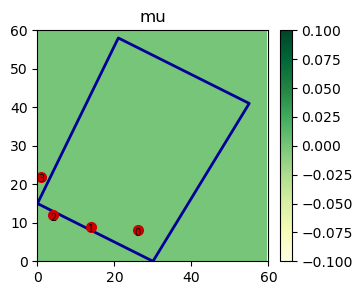

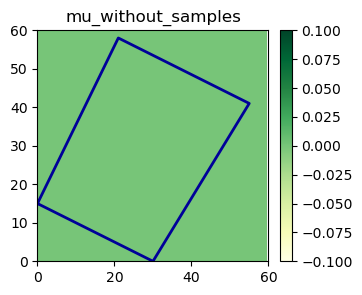

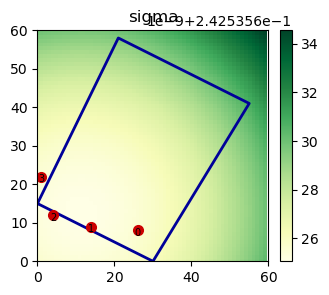

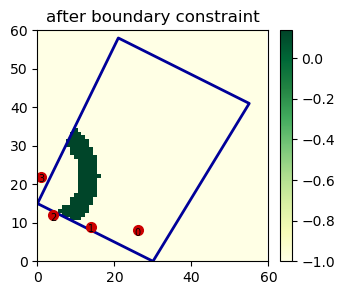

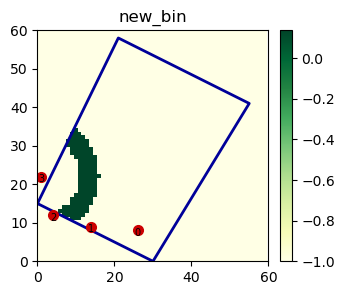

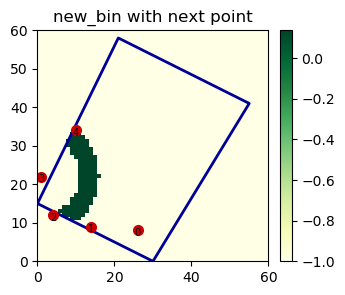

---------
[INFO] [1726240514.339604]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.47224238104337, -79.96627178429623) | (2.625, 8.625) | [10, 34] 
[INFO] [1726240514.374456]:  < Status: Received next scan loc > 
[INFO] [1726240514.375335]: ----------- Manager Loop END -----------
[INFO] [1726240514.376550]: ----------- Manager Loop: adaptive -----------
[INFO] [1726240514.377242]:  < Status: Navigating to scan loc > 
[INFO] [1726240514.382410]:  | Goal Sent to movebase...
[INFO] [1726240533.383495]:  | Movebase Goal Reached, Backing up...
[INFO] [1726240535.387802]:  < Status: Arrived at scan loc > 
[INFO] [1726240535.389035]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=9.5e+05)
Arrived at scan loc
[INFO] [1726240535.390741]: ----------- Manager Loop: adaptive -----------
[INFO] [1726240535.391820]:  < Status: Arm lowering > 
[INFO] [1726240549.460359]:  < Status: Arm lowered > 
[INFO] [1726240549.461761]: ----------- Manager Loop END ----------

In [12]:
for i in range(0,5):
    if (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()
        print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')
    
    print(m.status)

In [ ]:
for i in range(0,4):
    if (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()

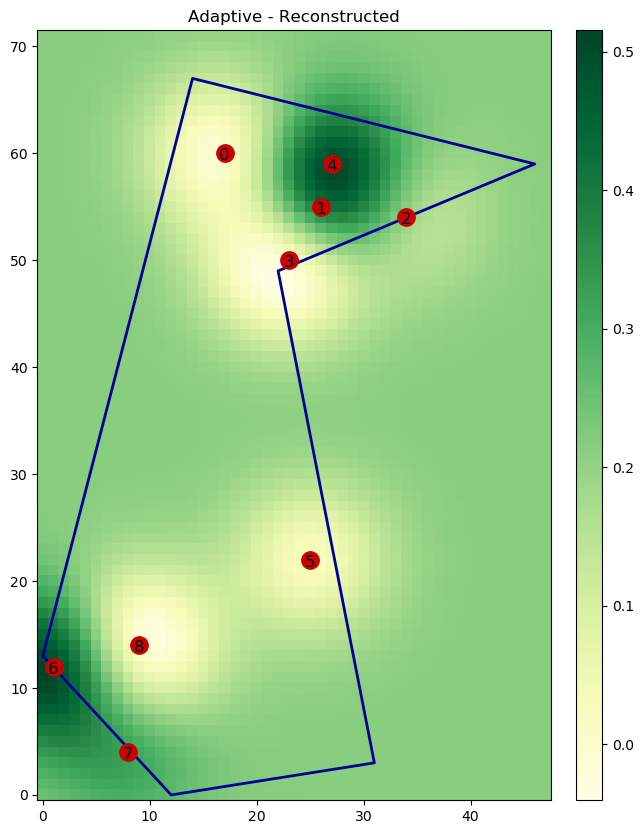

[INFO] [1726172302.500413]: Sampled at [9, 14] with value = 0.0
[INFO] [1726172302.502014]: Adaptive Norm Range: 0.5000


In [23]:
m.show()

/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:479: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


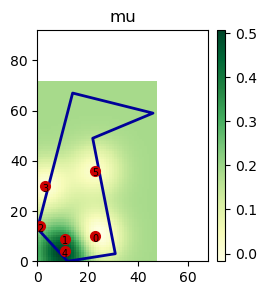

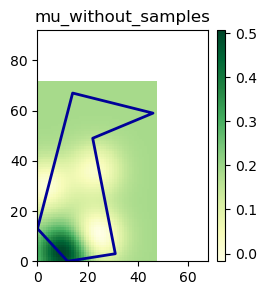

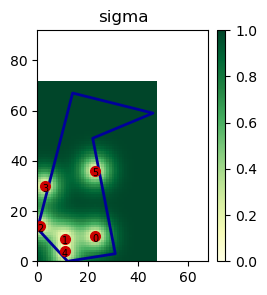

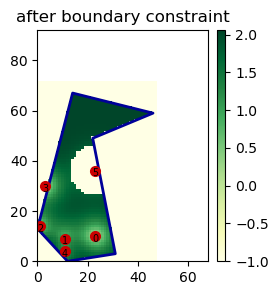

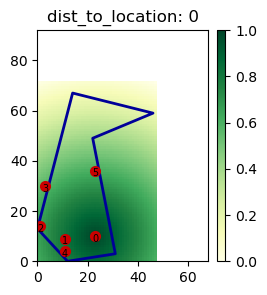

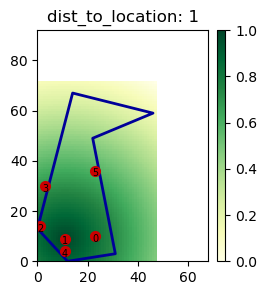

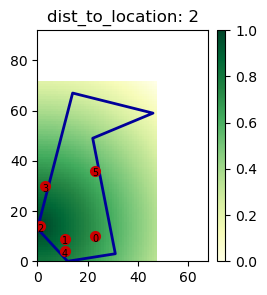

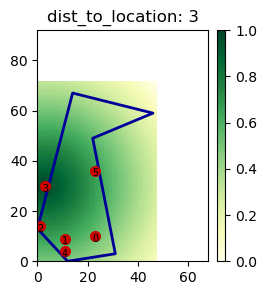

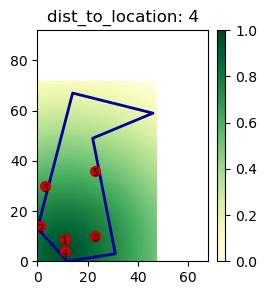

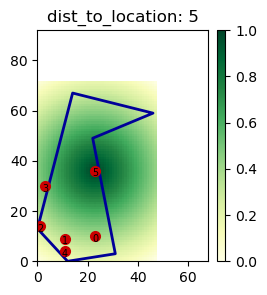

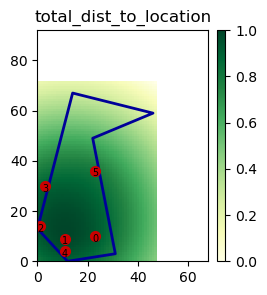

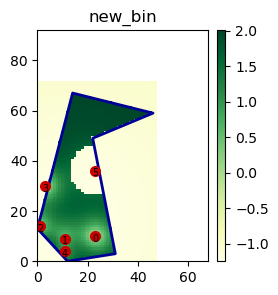

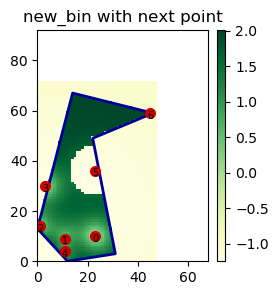

---------


[45, 59]

In [12]:
m.adaptiveROS.predict(True)

In [ ]:
sampled = [[m.adaptiveROS.sampled[0][1], m.adaptiveROS.sampled[0][0]]]
# sampled = m.adaptiveROS.sampled
print(sampled)
m.adaptiveROS.gp.fit(sampled, 
                     m.adaptiveROS.sampled_val) #todo: Should we re-init self.gp?

nextScanLoc = m.adaptiveROS.predict(True)

In [ ]:
nav_goal_map = m.conversion.grid2map(nextScanLoc[0], nextScanLoc[1])
nav_goal_gps = m.conversion.map2gps(nav_goal_map[0], nav_goal_map[1])
        
m.send_location_to_GUI(nav_goal_gps[0], nav_goal_gps[1])

In [8]:
import pickle


In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [17]:
with open('nrec_sep_13_adaptiveROS.pkl', 'wb') as file:
    pickle.dump(m.adaptiveROS, file)

In [56]:
with open('nrec_sep_13_transformer_variables.pkl', 'wb') as file:
    pickle.dump(member_vars, file)

In [54]:
member_vars.pop('adaptiveROS')

In [58]:
member_vars['tran

{'debug_flag': True,
 '_status_topic': '/autonomy_manager/status',
 '_joy_topic': '/joy',
 '_tf_utm_odom_frame': 'utm_odom',
 '_gq7_ekf_llh_topic': '/gq7/ekf/llh_position',
 '_move_base_action_server_name': 'move_base',
 '_crs_GPS': 'EPSG:4326',
 '_crs_UTM': 'EPSG:3364',
 '_manager_set_status_after_error_param_name': 'manager/set_status_after_error',
 '_gps_odom_topic': 'utm_odom',
 '_scan_recorded_to_disk_topic': 'scan_recorded_to_disk',
 '_is_arm_in_home_pose_param_name': 'arm/is_arm_in_home_pose',
 '_algorithm_type_param_name': 'algorithm_type',
 'algorithm_type': 'adaptive',
 'algorithm_total_samples': 16,
 '_sensor_prep_service_name': '/run_sensor_prep',
 '_set_search_boundary_name': '/autonomy_manager/deploy_autonomy',
 '_clear_service_name': 'clear',
 '_waypoints_service_name': 'waypoints',
 '_grid_points_service_name': 'grid_points',
 '_next_goal_to_GUI_service_name': 'next_goal_to_GUI',
 '_lower_arm_service_name': 'arm/lower',
 '_start_scan_service_name': 'scan_start',
 '_canc

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
m.show()